In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

7.585185869968172e-15

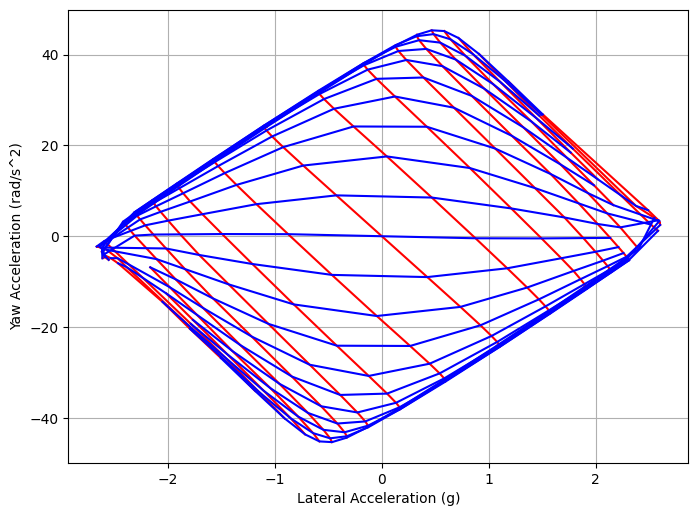

In [2]:
df = pd.read_csv("MMM.csv")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)

for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    lat_accel = list(df2["vehicle_accelerations_NTB_1"]/9.81)
    yaw_accel = list(df2["yaw_acceleration"])
    mid_point = int(len(lat_accel)/2)

    ax.plot(lat_accel, yaw_accel, 'r')
    #ax.text(lat_accel[mid_point], yaw_accel[mid_point], '{0:.2f}'.format(x*180/math.pi))

for x in df["steered_angle"].unique():
    if True:#x == 0:
        df2 = df[(df["steered_angle"] == x)]
        ax.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'b')
ax.grid()
ax.set_ylabel("Yaw Acceleration (rad/s^2)")
ax.set_xlabel("Lateral Acceleration (g)")

abs(df["yaw_acceleration"]).min()

In [3]:
for ii in df.columns:
    print(ii)

Unnamed: 0
ride_height
x_double_dot
y_double_dot
yaw_acceleration
roll
pitch
dynamics_tires_saturated
dynamics_two_tires_lifting
dynamics_total_inclination_angle_percent_loss
dynamics_total_inclination_angle_force_loss
dynamics_front_tube_forces
dynamics_rear_tube_forces
front_left_tire_unsprung_displacement
front_left_tire_tire_centric_forces_0
front_left_tire_tire_centric_forces_1
front_left_tire_tire_centric_forces_2
front_left_tire_velocity_0
front_left_tire_velocity_1
front_left_tire_velocity_2
front_left_tire_slip_angle
front_left_tire_inclination_angle
front_left_tire_vehicle_centric_forces_0
front_left_tire_vehicle_centric_forces_1
front_left_tire_vehicle_centric_forces_2
front_left_tire_moments_0
front_left_tire_moments_1
front_left_tire_moments_2
front_left_tire_steering_inclination
front_left_tire_z_c
front_left_tire_f_roll
front_left_tire_f_heave
front_left_tire_inclination_angle_percent_loss
front_left_tire_inclination_angle_force_loss
front_left_tire_tube_force_FUCA
front

In [4]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'p_rod', 'toe_link']:
    print(df['front_left_tire_tube_force_{}'.format(tube)].max() / 4.448)

571.1914205032239
171.4643040997493
189.6898685234626
253.39280978980463
318.3578947515794
0.0


In [5]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'p_rod', 'toe_link']:
    print(df['front_right_tire_tube_force_{}'.format(tube)].max() / 4.448)

571.1914205019762
173.14869829359375
189.68986852353783
253.39280978946928
321.41179387405845
0.0


In [6]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'p_rod', 'toe_link']:
    print(df['rear_left_tire_tube_force_{}'.format(tube)].max() / 4.448)

1870.0001296183366
500.9018013733932
340.99676657727036
441.24519676038324
-0.761561498127929
-0.20911157682657178


In [7]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'p_rod', 'toe_link']:
    print(df['rear_right_tire_tube_force_{}'.format(tube)].max() / 4.448)

1923.0144745784712
506.22060727579697
340.99676657670614
441.24519676139363
-0.1865779714117689
-0.1008567222858862


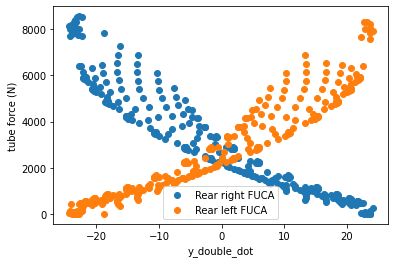

In [8]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_tube_force_FUCA'], label='Rear right FUCA')
plt.scatter(df['y_double_dot'], df['rear_left_tire_tube_force_FUCA'], label='Rear left FUCA')
plt.xlabel('y_double_dot')
plt.ylabel('tube force (N)')
plt.legend()
plt.show()

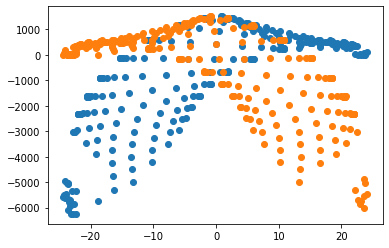

In [9]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_tube_force_FLCA'])
plt.scatter(df['y_double_dot'], df['rear_left_tire_tube_force_FLCA'])
plt.show()

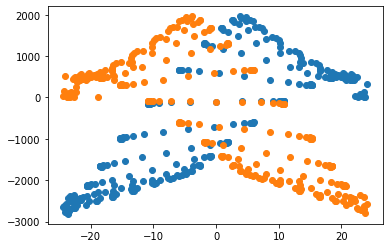

In [10]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_tube_force_RLCA'])
plt.scatter(df['y_double_dot'], df['rear_left_tire_tube_force_RLCA'])
plt.show()

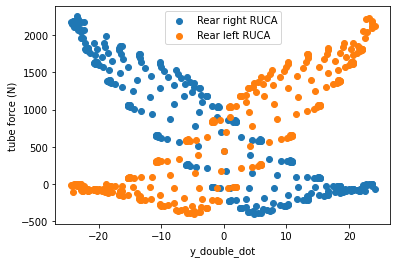

In [11]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_tube_force_RUCA'], label='Rear right RUCA')
plt.scatter(df['y_double_dot'], df['rear_left_tire_tube_force_RUCA'], label='Rear left RUCA')
plt.xlabel('y_double_dot')
plt.ylabel('tube force (N)')
plt.legend()
plt.show()

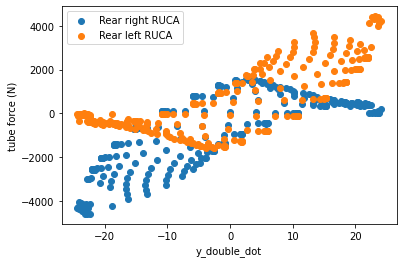

In [12]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_vehicle_centric_forces_1'], label='Rear right RUCA')
plt.scatter(df['y_double_dot'], df['rear_left_tire_vehicle_centric_forces_1'], label='Rear left RUCA')
plt.xlabel('y_double_dot')
plt.ylabel('tube force (N)')
plt.legend()
plt.show()

In [13]:
def get_front_tube_forces(force_in, get_lengths=False):
    force_arr = np.array(force_in)
    
    # Inputs (in inches, from CAD)
    pt1_i = np.array([0.063, 2.138, 11.539]).reshape((3, 1))
    pt1_f = np.array([5.875, 14.641, 7.759]).reshape((3, 1))

    pt2_i = np.array([0.063, 2.138, 11.539]).reshape((3, 1))
    pt2_f = np.array([-7.375, 14.641, 6.066]).reshape((3, 1))

    pt3_i = np.array([0.066, 1.6, 4.208]).reshape((3, 1))
    pt3_f = np.array([5.875, 15.791, 2.129]).reshape((3, 1))

    pt4_i = np.array([0.066, 1.6, 4.208]).reshape((3, 1))
    pt4_f = np.array([-7.373, 15.791, 2.402]).reshape((3, 1))

    pt5_i = np.array([0.08, 3.718, 4.925]).reshape((3, 1))
    pt5_f = np.array([-5.519, 11.975, 21.429]).reshape((3, 1))

    pt6_i = np.array([2.935, 2.393, 11.049]).reshape((3, 1))
    pt6_f = np.array([4.262, 13.291, 7.523]).reshape((3, 1))

    # Calculate
    pt_i_arr = np.concatenate((pt1_i, pt2_i, pt3_i, pt4_i, pt5_i, pt6_i), axis=1)
    pt_f_arr = np.concatenate((pt1_f, pt2_f, pt3_f, pt4_f, pt5_f, pt6_f), axis=1)

    v_arr = pt_f_arr - pt_i_arr
    lengths = np.apply_along_axis(np.linalg.norm, 0, v_arr)
    n_arr = v_arr / lengths
    
    # Set up Equation
    lever_arms = pt_i_arr * 0.0254 #in to m
    arr_cross = np.cross(n_arr.T, lever_arms.T).T 
    arr_coeff = np.concatenate((n_arr, arr_cross))
    
    # Solve
    b = np.concatenate((force_arr, np.zeros(3)))
    tube_forces = np.linalg.solve(arr_coeff, b)
    
    if get_lengths:
        return tube_forces, lengths
    else:
        return tube_forces

def get_rear_tube_forces(force_in, get_lengths=False):
    force_arr = np.array(force_in)
    # Inputs (in inches, from CAD)
    pt1_i = np.array([-0.126, 1.549, 12.583]).reshape((3, 1))
    pt1_f = np.array([7.125, 11.492, 9.55]).reshape((3, 1))

    pt2_i = np.array([-0.126, 1.549, 12.583]).reshape((3, 1))
    pt2_f = np.array([-7.75, 11.492, 9.55]).reshape((3, 1))

    pt3_i = np.array([0.131, 1.164, 5.243]).reshape((3, 1))
    pt3_f = np.array([7.124, 13.242, 3.354]).reshape((3, 1))

    pt4_i = np.array([0.131, 1.164, 5.243]).reshape((3, 1))
    pt4_f = np.array([-5.499, 13.242, 3.613]).reshape((3, 1))

    pt5_i = np.array([-0.043, 2.38, 11.279]).reshape((3, 1))
    pt5_f = np.array([5.576, 11.847, 4.112]).reshape((3, 1))

    pt6_i = np.array([3.498, 1.026, 9.11]).reshape((3, 1))
    pt6_f = np.array([7.125, 12.089, 7.433]).reshape((3, 1))
    
    # Calculate
    pt_i_arr = np.concatenate((pt1_i, pt2_i, pt3_i, pt4_i, pt5_i, pt6_i), axis=1)
    pt_f_arr = np.concatenate((pt1_f, pt2_f, pt3_f, pt4_f, pt5_f, pt6_f), axis=1)

    v_arr = pt_f_arr - pt_i_arr
    lengths = np.apply_along_axis(np.linalg.norm, 0, v_arr)
    n_arr = v_arr / lengths
    
    # Set up Equation
    lever_arms = pt_i_arr * 0.0254 #in to m
    arr_cross = np.cross(n_arr.T, lever_arms.T).T 
    arr_coeff = np.concatenate((n_arr, arr_cross))
    
    # Solve
    b = np.concatenate((force_arr, np.zeros(3)))
    tube_forces = np.linalg.solve(arr_coeff, b)
    
    if get_lengths:
        return tube_forces, lengths
    else:
        return tube_forces

In [14]:
df_vcf_rr = df[['rear_right_tire_vehicle_centric_forces_0', 'rear_right_tire_vehicle_centric_forces_1', 'rear_right_tire_vehicle_centric_forces_2']]#[np.abs(df['y_double_dot']) < 1]

In [15]:
df_tubes_rr = df_vcf_rr.apply(get_rear_tube_forces, axis=1)

In [16]:
np.stack(-df_tubes_rr.values).max(0) / 4.448

array([-3.20145709e-02,  9.03775770e+01,  1.40493224e+03,  6.33086769e+02,
        1.51813368e+03,  1.34243206e+02])

In [17]:
np.argmax(np.stack(df_tubes_rr.values)[0,:])
#df_vcf_rr
#df['rear_right_tire_vehicle_centric_forces_1'].max()

0

In [18]:
df_vcf_rl = df[['rear_left_tire_vehicle_centric_forces_0', 'rear_left_tire_vehicle_centric_forces_1', 'rear_left_tire_vehicle_centric_forces_2']]#[np.abs(df['y_double_dot']) < 1]

In [19]:
df_tubes_rl = df_vcf_rl.apply(get_rear_tube_forces, axis=1)

In [20]:
np.stack(-df_tubes_rl.values).max(0) / 4.448

array([-9.87355771e-01,  3.49889654e+02,  3.71219319e+02,  3.42841719e+02,
        1.73832811e+03,  3.35216550e+02])

In [21]:
df_test = pd.concat([df_vcf_rl, df_vcf_rr], axis=1)
df_test.head()

,rear_left_tire_vehicle_centric_forces_0,rear_left_tire_vehicle_centric_forces_1,rear_left_tire_vehicle_centric_forces_2,rear_right_tire_vehicle_centric_forces_0,rear_right_tire_vehicle_centric_forces_1,rear_right_tire_vehicle_centric_forces_2
0,-26.634419,-81.972314,46.099572,-1494.733373,-4600.316294,2317.198570
1,-20.760393,-63.893920,35.830138,-1496.662670,-4606.254062,2320.310882
2,-26.959842,-82.973861,46.666115,-1493.392017,-4596.188025,2315.035963
3,-1.619210,-4.983417,1.768354,-1457.369655,-4485.322595,2257.360170
4,-12.438291,-38.281123,21.136713,-1420.522462,-4371.918596,2199.219479
